In [1]:
data_path = '../../data/'

In [2]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils import TextProcessor

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
jtplot.style('gruvboxd')

In [4]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')
pro = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

# Text processing

In [6]:
tp = TextProcessor()

In [7]:
features = ['questions_title', 'questions_body', 'answers_body', 'professionals_industry', 'professionals_headline']
target = ['tags_tag_name']

In [8]:
for df, column in tqdm(zip([que, que, ans, pro, pro], features)):
    df[column] = df[column].apply(tp.process)
tag[target] = tag[target].apply(lambda x: tp.process(x, allow_stopwords = True))

# Data wrangling

In [9]:
que_tags = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
que_tags = que.merge(que_tags[['questions_id', 'tags_tag_name', 'tags_tag_raw']], on = 'questions_id')
ans_que_tags = ans.merge(que_tags, left_on = "answers_question_id", right_on = "questions_id")
df = ans_que_tags.merge(pro, left_on = 'answers_author_id', right_on = 'professionals_id')

In [10]:
df

answers_id                 answers_author_id  \
0       4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
1       4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
2       4e5f01128cae4f6d8fd697cec5dca60c  36ff3b3666df400f956f8335cf53e09e   
3       f3519ab99a1a4a13a8a9ecb814287d2a  36ff3b3666df400f956f8335cf53e09e   
4       f3519ab99a1a4a13a8a9ecb814287d2a  36ff3b3666df400f956f8335cf53e09e   
5       f3519ab99a1a4a13a8a9ecb814287d2a  36ff3b3666df400f956f8335cf53e09e   
6       825f6e316a5f48328d6f8af831df9940  36ff3b3666df400f956f8335cf53e09e   
7       825f6e316a5f48328d6f8af831df9940  36ff3b3666df400f956f8335cf53e09e   
8       825f6e316a5f48328d6f8af831df9940  36ff3b3666df400f956f8335cf53e09e   
9       f3fc23809cda472780fc565334f35000  36ff3b3666df400f956f8335cf53e09e   
10      f3fc23809cda472780fc565334f35000  36ff3b3666df400f956f8335cf53e09e   
11      f3fc23809cda472780fc565334f35000  36ff3b3666df400f956f8335cf53e09e   
12      f3fc23809cda472780fc565334f35000  36ff3b3666df400f956f8335cf53e09e   
13      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
14      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
15      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
16      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
17      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
18      7410001e9a2f46df982cba38ba60486a  36ff3b3666df400f956f8335cf53e09e   
19      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
20      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
21      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
22      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
23      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
24      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
25      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
26      8961104db49b42e6882661724543b565  36ff3b3666df400f956f8335cf53e09e   
27      d29c121eb71b43a3a338008353559bdd  36ff3b3666df400f956f8335cf53e09e   
28      d29c121eb71b43a3a338008353559bdd  36ff3b3666df400f956f8335cf53e09e   
29      ba25ed162f2e46deb1f022372c84c9c7  36ff3b3666df400f956f8335cf53e09e   
...                                  ...                               ...   
173334  892b3e1a17b546189a0be0bfce75a406  fcd39d50647949aebc6ec7492b01bf9b   
173335  892b3e1a17b546189a0be0bfce75a406  fcd39d50647949aebc6ec7492b01bf9b   
173336  9a15cdf8003240698a70c3f4c406cc0e  253c1f1594264746b27fd7d2ee8492d4   
173337  9a15cdf8003240698a70c3f4c406cc0e  253c1f1594264746b27fd7d2ee8492d4   
173338  b0f1f5810d034f7e8e4c350e885f899c  521ecd5ed4d94bfeae5ae8d08eb72dd8   
173339  b0f1f5810d034f7e8e4c350e885f899c  521ecd5ed4d94bfeae5ae8d08eb72dd8   
173340  b0f1f5810d034f7e8e4c350e885f899c  521ecd5ed4d94bfeae5ae8d08eb72dd8   
173341  b0f1f5810d034f7e8e4c350e885f899c  521ecd5ed4d94bfeae5ae8d08eb72dd8   
173342  ea3e918a5b9d47d3b069fd39849ba4b7  cafb6a1bb68a40d896bf5325b29650b4   
173343  8ee8f4a7f876450682920497eb77d722  351efcf5f61147199176671cc3d6f431   
173344  8ee8f4a7f876450682920497eb77d722  351efcf5f61147199176671cc3d6f431   
173345  8ee8f4a7f876450682920497eb77d722  351efcf5f61147199176671cc3d6f431   
173346  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173347  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173348  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173349  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173350  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173351  a63374bdce224de28a304eb78552784f  39ee61362bce4500b22dd5abead4932c   
173352  b1f5b756969b432e97a6d0f1826f28d7  16cf8cc0e24b43ea9dd222bcadc94f38   
173353  b1f5b756969b432e97a6d0f1826f28d7  16cf8cc0e2

# Final preparation

In [11]:
prepared = []
for feature in tqdm(features):
        prepared += [TaggedDocument(row[feature].split(), [row[target]]) for i, row in df[[feature, target]].drop_duplicates().iterrows()]
prepared += [TaggedDocument(s.split(), [s]) for s in df[target].drop_duplicates()]

In [12]:
prepared[0]

TaggedDocument(words=['teacher', 'career', 'question'], tags=['lectur'])

In [13]:
prepared = random.sample(prepared, len(prepared))

In [14]:
len(prepared)

479041

# Doc2Vec

In [15]:
d2v = Doc2Vec(prepared, vector_size = 10, workers = 4, iter = 20, dm = 0)

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


In [16]:
proj = TSNE(n_components = 2, verbose = 1).fit_transform(d2v.docvecs.vectors_docs)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5988 samples in 0.013s...
[t-SNE] Computed neighbors for 5988 samples in 1.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5988
[t-SNE] Computed conditional probabilities for sample 2000 / 5988
[t-SNE] Computed conditional probabilities for sample 3000 / 5988
[t-SNE] Computed conditional probabilities for sample 4000 / 5988
[t-SNE] Computed conditional probabilities for sample 5000 / 5988
[t-SNE] Computed conditional probabilities for sample 5988 / 5988
[t-SNE] Mean sigma: 0.588190
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.014809
[t-SNE] KL divergence after 1000 iterations: 1.813614


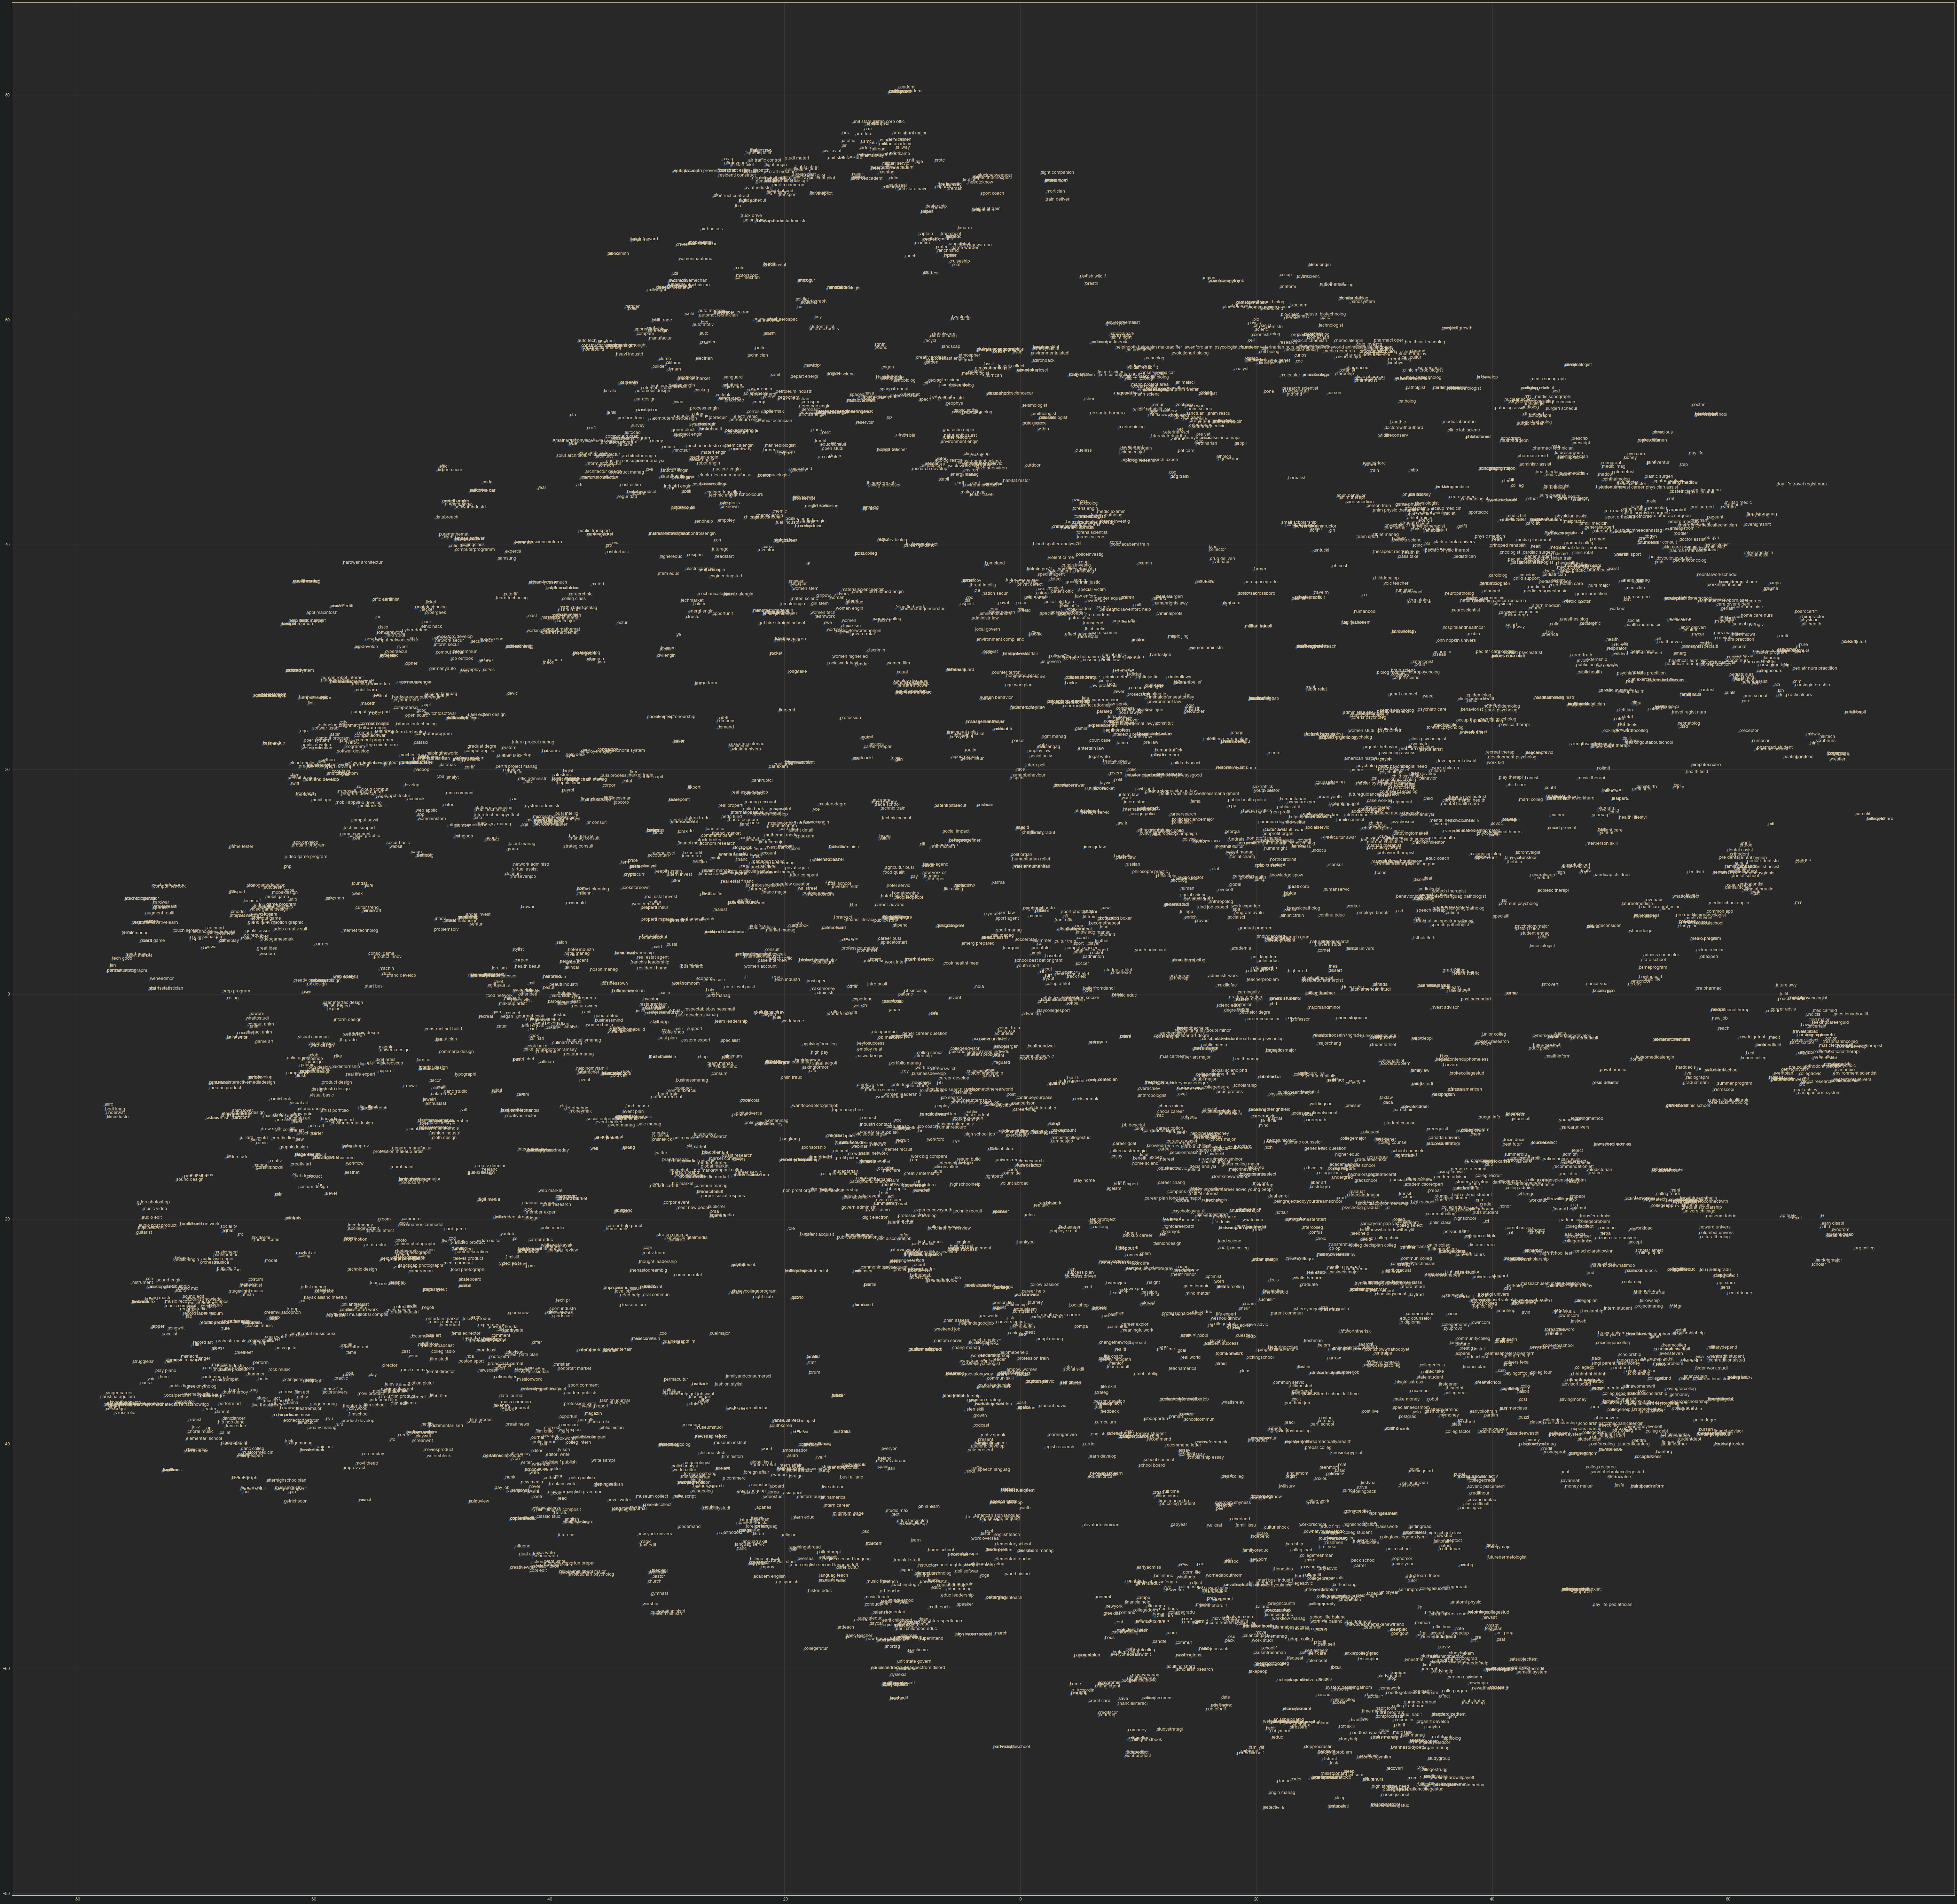

In [17]:
fig, ax = plt.subplots(figsize = (100, 100))

plt.scatter(proj[:, 0], proj[:, 1], alpha = 0.5)

for i, name in tqdm(enumerate(d2v.docvecs.index2entity)):
    ax.annotate(name, (proj[i, 0], proj[i, 1]))

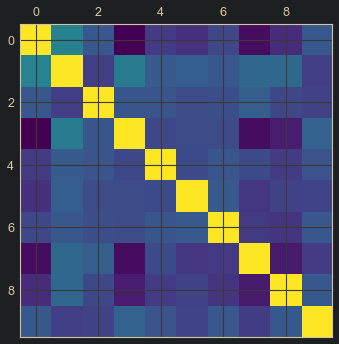

In [18]:
plt.matshow(pd.DataFrame(d2v.docvecs.vectors_docs).corr())

In [19]:
pd.DataFrame(d2v.docvecs.vectors_docs).corr()

0         1         2         3         4         5         6  \
0  1.000000  0.269313  0.045572 -0.310760 -0.080706 -0.126338 -0.033469   
1  0.269313  1.000000 -0.066860  0.222049  0.067686  0.080031  0.045628   
2  0.045572 -0.066860  1.000000  0.038565  0.033695 -0.012026  0.001919   
3 -0.310760  0.222049  0.038565  1.000000 -0.026086 -0.003886 -0.004123   
4 -0.080706  0.067686  0.033695 -0.026086  1.000000 -0.018518  0.041989   
5 -0.126338  0.080031 -0.012026 -0.003886 -0.018518  1.000000  0.054551   
6 -0.033469  0.045628  0.001919 -0.004123  0.041989  0.054551  1.000000   
7 -0.268993  0.127429  0.085610 -0.265895 -0.016302 -0.101202 -0.086546   
8 -0.142710  0.130557 -0.029077 -0.205956 -0.076120 -0.054497 -0.114190   
9  0.049413 -0.066950 -0.056357  0.101650  0.024106 -0.048980  0.046752   

          7         8         9  
0 -0.268993 -0.142710  0.049413  
1  0.127429  0.130557 -0.066950  
2  0.085610 -0.029077 -0.056357  
3 -0.265895 -0.205956  0.101650  
4 -0.016302 -0.076120  0.024106  
5 -0.101202 -0.054497 -0.048980  
6 -0.086546 -0.114190  0.046752  
7  1.000000 -0.213753 -0.082718  
8 -0.213753  1.000000  0.051874  
9 -0.082718  0.051874  1.000000

# Save

In [20]:
d2v.save('tags.d2v')

In [21]:
docvecs = {d2v.docvecs.index2entity[i]: d2v.docvecs.vectors_docs[i] for i in range(len(d2v.docvecs.index2entity))}

In [22]:
with open('tags_embs.pickle', 'wb') as file:
    pickle.dump(docvecs, file)